In [1]:
#@title Mount Drive
# access google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#@title Main Algo
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import os, os.path
import scipy.optimize as opt
import scipy.integrate as integrate
from copy import deepcopy
from itertools import permutations
from numba import guvectorize, vectorize, cuda
from concurrent.futures import ThreadPoolExecutor
import time
import threading
from matplotlib import image
import pandas as pd
import numpy as np
import mpmath as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.optimize as opt
from copy import deepcopy


In [3]:

# Change default plotting parameters
mpl.rcParams['image.cmap'] = 'bone_r'
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams['font.size'] = 14


In [4]:
from IPython.utils.process import arg_split
class TestAccumulator:
  def __init__(self,arg):
    self.results = []
    workingDir = arg


  def execute(self, workingDir):
    os.chdir(workingDir)
    pathNames=[];
    for (name, dirs, files) in os.walk(os.getcwd()):
        test = name
        test2 = dirs
        test3 = files
        for dir in dirs:
            os.chdir(WorkingDirectory+"/"+dir)
            nameList=[name for name in os.listdir('.') if os.path.isfile(name)]
            for i in nameList:
                pathNames.append(os.getcwd()+"/"+i);
    for path in pathNames:
      xeInst = XeFile(path)
      self.results.append(xeInst)


# Primary Class for doing Xe Beta-Gamma Analysis
class XeFile(dict):
  #initalizes new Xe class
  def __init__(self, arg):
    dict.__init__(self)
    if type(arg) is str:
      self.filename = arg
      self.loadFromPHD(arg)
    elif type(arg) is dict:
      print("do stuff")
    else:
      raise Exception("XeFile requires either a string file path or a dictionary as its arguement.")


  # open parses out .phd files into self
  # parameter is a .phd python file object
  def loadFromPHD(self, filePath):

    #returns int or float if s is a number
    def stringToNum(s):
      try: return int(s)
      except ValueError:
        try: return float(s)
        except ValueError:
          return s

    # find will find the letter 'n' in each file name to parse out the concentrations
    def find(s):
      return [i for i, ltr in enumerate(s) if ltr == 'n']



    filename = filePath[filePath.rfind('/')+1:];
    labels=[];
    conc=[];
    conc1=0;
    conc2=0;
    conc3=0;
    conc4=0;
    if ("Xe131m_Xe133m_Xe133_Xe135") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(7);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe131m_Xe133m_Xe133") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(5);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe131m_Xe133_Xe135") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(6);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe133andXe133m") in filePath:
        conc1=float(filename[0:filename.find("n")])
        conc2=float(filename[filename.find("n")+1:-4])
        #dat.remove(bg_dat);
        #dat.append(swap(bg_dat))
        labels.append(2)
        conc.append([0,conc1,conc2,0])
    elif ("Xe131m_Xe135") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(8);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe131m_Xe133") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(4);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe133_Xe135") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(9);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe133m_Xe133_Xe135") in filePath:
        ind=find(filename);
        conc1=float(filename[0:ind[0]]);
        conc2=float(filename[ind[0]+1:ind[1]]);
        conc3=float(filename[ind[1]+1:ind[2]]);
        conc4=float(filename[ind[2]+1:-4]);
        labels.append(10);
        conc.append([conc1,conc2,conc3,conc4])
    elif ("Xe131m") in filePath:
        conc1=float(filename[:-4])
        labels.append(0)
        conc.append([conc1,0,0,0])
    elif ("Xe133") in filePath:
        conc1=float(filename[:-4])
        labels.append(1)
        conc.append([0,conc1,0,0])
    elif ("Xe135") in filePath:
        conc1=float(filename[:-4])
        labels.append(3)
        conc.append([0,0,0,conc1])

    self.concentration = [conc1,conc2,conc3,conc4]


    # Adds dictionary of blocks from file to XeFile object.  Determines each block key from hashtag in file.
    f = open(filePath)
    self.update({'filePath': filePath})
    self.update( dict( block.split('\n',1) for block in f.read().split('#') ) )
    f.close()

    # Converts contents of each block into a list of lines.  Each line is a list of ints, floats, and strings.
    for key in self:
      self[key] = [s for s in self[key].split('\n') if s]
      self[key] = [[ stringToNum(s) for s in line.split() ] for line in self[key] ]

    # this is the info for each block.  newName is the key we will use in this program for a given block.  keys specifies the data
    blocks = [{'oldName': 'g_Energy', 'newName': 'gammaEnergyCalibration', 'keys': ['energy', ['channel', ['value','uncertainty']]]},
              {'oldName': 'b_Energy', 'newName': 'betaEnergyCalibration', 'keys': ['energy', 'type', ['channel',['value','uncertainty']]]},
              {'oldName': 'g_Resolution', 'newName': 'gammaResolution', 'keys': ['energy', ['fwhm', ['value','uncertainty']]]},
              {'oldName': 'b_Resolution', 'newName': 'betaResolution', 'keys': ['energy', ['fwhm', ['value','uncertainty']]]},
              {'oldName': 'g_Efficiency', 'newName': 'gammaEfficiency', 'keys': ['energy', ['efficiency', ['value','uncertainty']]]},
              {'oldName': 'b-gEfficiency', 'newName': 'betaEfficiency', 'keys': ['nuclide', 'roi', ['efficiency', ['value','uncertainty']]]},
              {'oldName': 'Ratios', 'newName': 'ratios', 'keys': ['identifier', 'roiHigher', 'roiLower', ['ratio', ['value','uncertainty']]]},
              {'oldName': 'ROI_Limits', 'newName': 'roiEnergyRange', 'keys': ['roi', 'blower', 'bupper', 'glower', 'gupper']},
              ]

    # build each block in the XeDict using the info in blocks
    for block in blocks:
      self[block['newName']] = []
      oldBlock = self.pop(block['oldName'])
      for line in oldBlock:
        lineDict = {}
        for i, key in enumerate(block['keys']): # builds the line dictionary based on keys specified in block
          if type(key) is list:
            lineDict.update({key[0]: { subkey : line[i+j] for j, subkey in enumerate(key[1]) } })
          else:
            lineDict.update({key: line[i]})
        self[block['newName']] += [lineDict] # adds the line dictionary to the block list

    # clean up ROI block
    self['roiEnergyRange'] = { roi['roi']: {'beta': {'lower': roi['blower'], 'upper': roi['bupper']}, \
                                            'gamma': {'lower': roi['glower'], 'upper': roi['gupper']}} \
                                for roi in self['roiEnergyRange'] }

    # Build beta and gamma singles spectra as Pandas Series
    self.getEnergies()
    spectraType = {'beta': 'b', 'gamma': 'g'}
    for key in spectraType:
      spectrum = self.pop(spectraType[key] + '_Spectrum')[1:]
      for line in spectrum: del line[0]
      self[key + 'Spectrum'] = pd.Series(np.concatenate(spectrum).flat, index = self[key + 'Energy'].values)

    # Build beta gamma histogram as Pandas DataFrame
    histogram = self.pop('Histogram')[1:-1]
    N = pd.DataFrame(np.array(histogram), index = self['gammaEnergy'].values, columns = self['betaEnergy'].values)
    dx = self['betaEnergyDelta']
    dy = self['gammaEnergyDelta']
    sigma_dx = self['betaEnergyDeltaUncertainty']
    sigma_dy = self['gammaEnergyDeltaUncertainty']

    self['histogram'] = N/(dx*dy)
    self.histogram = N/(dx*dy)
    self['histogramUncertainty'] = np.sqrt( (np.sqrt(N)/(dx*dy))**2 + (-N*sigma_dx/(dx**2*dy))**2 + (-N*sigma_dy/(dx*dy**2))**2 + 0.1/(dx*dy))
    # TO DO: figure out how to calculate background uncertainty besides what I do now = 0.1 / (dx dy)




    return self

  # calculate energies of each bin
  # gets slope & intercept on weighted best fit to convert channel to energy.  As usual, weights are 1/uncertainty
  def getEnergies(self, plotEnergyChannelFit=False):
    for energyType in ['betaEnergy', 'gammaEnergy']:

      energies = np.array([ data['energy'] for data in self[energyType + 'Calibration'] ])
      channels = np.array([ data['channel']['value'] for data in self[energyType + 'Calibration'] ])
      uncertainties = np.array([ data['channel']['uncertainty'] if data['channel']['uncertainty'] != 0. else 0.000001
                                for data in self[energyType + 'Calibration'] ])
      # E = dE*channel + E0
      # sigma_E = sqrt((channel*sigma_dE)^2 + sigma_E0^2 + channel*sigma_dE,E0)
      (self[energyType + 'Delta'], E0 ), covariance = np.polyfit(channels, energies, 1, w = 1/uncertainties, cov = True)
      self[energyType +'DeltaUncertainty'] = np.sqrt(covariance[0,0])
      chan = pd.Series(range(1,257), index = range(1,257))
      self[energyType] = chan*self[energyType + 'Delta'] + E0
      self[energyType + 'Uncertainty'] = np.sqrt( (chan*covariance[0,0])**2 + covariance[1,1]**2 + 2*chan*abs(covariance[0,1]) )
      self[energyType + 'Min'] = self[energyType].iloc[0]
      self[energyType + 'Max'] = self[energyType].iloc[-1]


      if plotEnergyChannelFit is True:
        plt.rcParams["figure.figsize"] = (4,4)
        x = np.arange(1,101)
        y = self[energyType][:100]
        yminus = self[energyType][:100] - self[energyType + 'Uncertainty'][:100]
        yplus = self[energyType][:100] + self[energyType + 'Uncertainty'][:100]
        plt.plot(x, y, color = 'black')
        plt.plot(x, yminus, linestyle = 'dashed', color = 'black')
        plt.plot(x, yplus, linestyle = 'dashed', color = 'black')
        plt.errorbar(channels, energies, yerr=uncertainties, fmt='o' )
        plt.xlabel = 'Channel'
        plt.ylabel = energyType
        plt.show()

    #self.dx , self.dy = self['betaEnergyDelta'] , self['gammaEnergyDelta']

    return (self['betaEnergy'], self['gammaEnergy'])

def plotProjection(data, spectrumObject = None, figureScale = 1, resolution = 500):

  # Prep list of isotopes for plotting
  if type(spectrumObject) is list:
    x = np.linspace(data.columns[0], data.columns[-1], resolution)
    y = np.linspace(data.index[0], data.index[-1], resolution)
    xmesh, ymesh = np.meshgrid(x,y)
    spectrumObject = pd.DataFrame( spectrum(spectrumObject, xmesh, ymesh), columns = x, index = y)

  # Prep beta and gamma spectra for plotting (integrate spectra over y and x axis respectively)
  if type(spectrumObject) is pd.DataFrame:
    dx = spectrumObject.columns[1] - spectrumObject.columns[0]
    dy = spectrumObject.index[1] - spectrumObject.index[0]
    xSpectrum = spectrumObject.sum(0)*dy
    ySpectrum = spectrumObject.sum(1)*dx
  else:
    xSpectrum = None
    ySpectrum = None

  dataDx = data.columns[1]-data.columns[0]
  dataDy = data.index[1]-data.index[0]

  # Define axes aspect ratios based on histogram shape
  axesRatios = np.array([data.columns[-1] - data.columns[0], data.index[-1] - data.index[0]])
  axesRatios = 3*axesRatios / max(axesRatios)
  figureSize = figureScale*2*(1 + axesRatios) + np.array([2,0])

  # Make figure and axes for subplots
  fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize = figureSize,
                        gridspec_kw = {'height_ratios':[axesRatios[1],1], 'width_ratios':[1,axesRatios[0]]})

  # Plot histogram
  plot(data, spectrumObject, axes = ax2, xLabel = None, yLabel = None)
  # Plot beta axis (integrate data over y axis)
  plot(data.sum(0)*dataDy, xSpectrum, axes = ax4, xLabel = r'$E_\beta$ (keV)')

  # Plot gamma axis (integrate data over x axis)
  dataGamma = data.sum(1)*dataDx
  ax1.errorbar(dataGamma.values, dataGamma.index, xerr = np.sqrt(dataGamma.values), fmt='.')
  if ySpectrum is not None:
    y = ySpectrum.index
    ax1.plot(ySpectrum.values, y)
  ax1.invert_xaxis()
  ax1.margins(0.05,0)
  ax1.set_ylabel(r'$E_\gamma$ (keV)')

  # Label Counts for beta and gamma plots
  ax3.axis('off')
  ax3.text(0, 0, 'Counts / keV', rotation=0)
  ax4.set_ylabel('')

  return [fig, [[ax1, ax2],[ax3, ax4]] ]


In [5]:
WorkingDirectory= r'/content/drive/MyDrive/XeData/sims3'

This bit of code runs through all the data and then gets the histograms that we want, already transformed.

In [6]:
bob = TestAccumulator(WorkingDirectory)
bob.execute(WorkingDirectory)
conclist = []
histlist = []
for result in bob.results:
  conclist.append(result.concentration)
  histlist.append(result.histogram)

histData = np.array(histlist,dtype = np.uint16)
concData = np.array(conclist, dtype = np.uint32)

## This plot just shows the energy spectra for one file, I wanted to make sure that the data looked reasonable before feeding it into the networks.

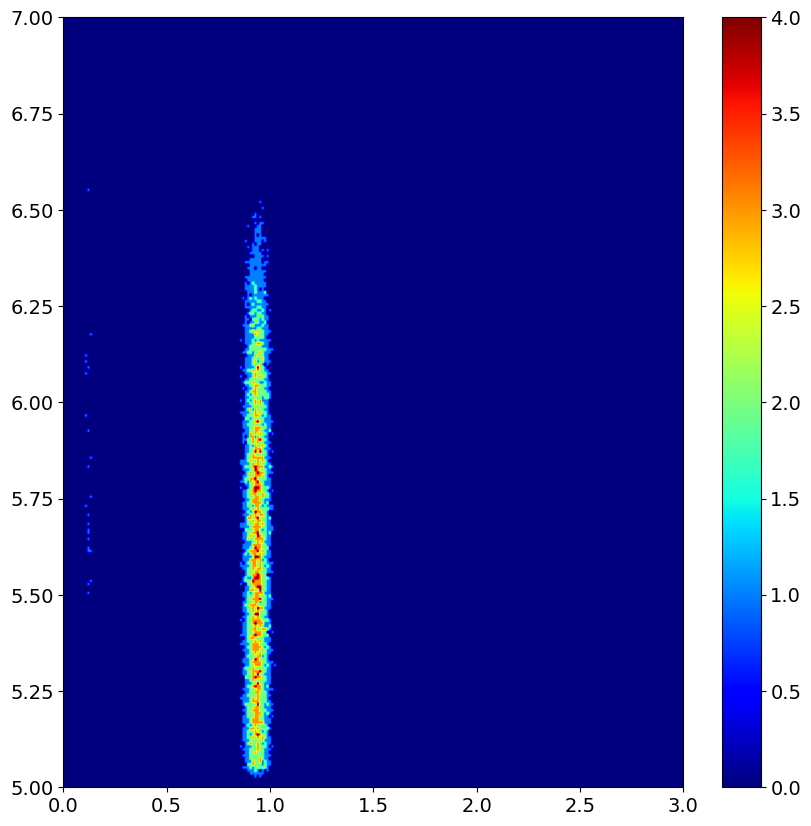

In [ ]:
plt.imshow(np.transpose(histData[570]), extent =[0, 3, 5, 7], cmap='jet', aspect='auto')
plt.colorbar()
plt.show()

In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ewf3jhaq
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-ewf3jhaq
  Resolved https://github.com/tensorflow/docs to commit af33301a434ea70e104865b9d2e93e230494c1cb
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.10.27.81990-py3-none-any.whl size=184142 sha256=bedeb7a842cbbb4e3236436f25067c409e44cc61f6f32002e6b9e43dcd9302ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-g306o8vy/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [7]:
#Frankly I can't remember what packages I do and don't use at this point, so this is a huge mess. Need to clean up eventually

from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau


In [8]:
# Break into test and train sets
from tensorflow.keras.callbacks import Callback

#tried to implement a callback that would
class CustomCallback(Callback):
    def on_epoch_end(self, batch, logs=None):
        # Your custom logic for tracking or logging metrics at the end of each batch
        mse = logs.get('mse')  # Replace 'mse' with the actual name of your metric
        mae = logs.get('mae')  # Replace 'mae' with the actual name of your metric
        msle = logs.get('msle')  # Replace 'msle' with the actual name of your metric

X_train_val, X_test, y_train_val, y_test = train_test_split(histData, concData, test_size=0.2, random_state=42)
redlr=ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0)
train_set, test_set, train_conc, test_conc = train_test_split(histData, concData, test_size=0.2, random_state=seed)


# FCNN Code

In [ ]:

from keras.callbacks import ReduceLROnPlateau

# This is where our training happens for our NN model
# Gives us our models, test_predictions and histories of size 40.

nodes=30;

modelsNN=[]
test_predictionsNN=[]
historiesNN=[]

# This allows us to edit the monitor output from the models to diagnose it while training
redlr=ReduceLROnPlateau(monitor='val_loss', factor=0.85, patience=5, verbose=0)

    # Model is constructed of 3 layers, 1 input (which flattens our histogram into feature columns),
    # 1 hidden layer of 30 nodes and an output layer of 4 nodes for the isomer vector
modelNN = keras.Sequential([
  keras.layers.Flatten(input_shape=(256, 256)),
  keras.layers.Dense(64, activation='relu',kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)),
  keras.layers.Dense(32, activation = 'relu',kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)),
  keras.layers.Dense(4)
])
modelNN.compile(loss='mse',optimizer='adam',metrics=['mae', 'mse']);
    # This particular version of the model also has a validation set (15% of train_set), which is like
    # a mini test set built within the training set to validate how well our model is performing for unique
    # (non training data) at the end of each epoch



In [ ]:
historyNN=modelNN.fit(train_set, train_conc, epochs=5, validation_split=0.15, batch_size=32, callbacks=redlr);
historiesNN.append(historyNN);
modelsNN.append(modelNN);
test_predictionsNN.append(modelNN.predict(test_set));

Epoch 1/5
62/62 [==============================] - 3s 47ms/step - loss: 136538038272.0000 - mae: 187581.3438 - mse: 136538038272.0000 - val_loss: 137620930560.0000 - val_mae: 191568.6094 - val_mse: 137620930560.0000 - lr: 0.0010
Epoch 2/5
62/62 [==============================] - 3s 45ms/step - loss: 132821229568.0000 - mae: 187151.1250 - mse: 132821229568.0000 - val_loss: 130066448384.0000 - val_mae: 191488.2344 - val_mse: 130066448384.0000 - lr: 0.0010
Epoch 3/5
62/62 [==============================] - 3s 52ms/step - loss: 119472922624.0000 - mae: 187016.6875 - mse: 119472922624.0000 - val_loss: 111079768064.0000 - val_mae: 192537.0938 - val_mse: 111079768064.0000 - lr: 0.0010
Epoch 4/5
62/62 [==============================] - 4s 63ms/step - loss: 96581836800.0000 - mae: 187094.9531 - mse: 96581836800.0000 - val_loss: 87922147328.0000 - val_mae: 194692.8281 - val_mse: 87922147328.0000 - lr: 0.0010
Epoch 5/5
19/19 [==============================] - 0s 8ms/step


# CNN Section - needs to add histories and stuff if we want to benchmark with the same plotting done by Robbie

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

modelCNN = models.Sequential()
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256,1)))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(4))



In [ ]:
modelCNN.compile(optimizer='adam', loss='mse',metrics=['mse','mae'])
modelsCNN=[]
test_predictionsCNN=[]
historiesCNN=[]
historyCNN = modelCNN.fit(train_set, train_conc, epochs=5, validation_split=0.25, batch_size = 32, callbacks=redlr);
historiesCNN.append(historyCNN);
modelsCNN.append(modelCNN);
test_predictionsCNN.append(modelCNN.predict(test_set));

Epoch 1/5
55/55 [==============================] - 131s 2s/step - loss: 99685236736.0000 - mse: 99685236736.0000 - mae: 190162.7812 - val_loss: 46355234816.0000 - val_mse: 46355234816.0000 - val_mae: 162565.0625 - lr: 0.0010
Epoch 2/5
55/55 [==============================] - 131s 2s/step - loss: 32563935232.0000 - mse: 32563935232.0000 - mae: 122978.0312 - val_loss: 27260395520.0000 - val_mse: 27260395520.0000 - val_mae: 105470.0859 - lr: 0.0010
Epoch 3/5
55/55 [==============================] - 149s 3s/step - loss: 24425949184.0000 - mse: 24425949184.0000 - mae: 101744.0625 - val_loss: 24237529088.0000 - val_mse: 24237529088.0000 - val_mae: 98135.6250 - lr: 0.0010
Epoch 4/5
55/55 [==============================] - 140s 3s/step - loss: 20821491712.0000 - mse: 20821491712.0000 - mae: 90981.3828 - val_loss: 20252968960.0000 - val_mse: 20252968960.0000 - val_mae: 86964.0312 - lr: 0.0010
Epoch 5/5
19/19 [==============================] - 11s 553ms/step


# This is the combined model. First it runs through a CNN to get features, and then adds those features to the input data and puts that through a FCNN. Note that none of the hyperparameters here have been optimized, I just used the same CNN and FCNN structures from the previous sections

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, concatenate, MaxPooling2D, UpSampling2D, Dropout

# Assuming input shapes
input_shape_cnn = (256, 256, 1)  # Adjust based on your CNN input
input_shape_existing_data = (256, 256, 1)  # Adjust based on your additional data

# Define the CNN
cnn_input = Input(shape=input_shape_cnn)
cnn_output = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = 'same')(cnn_input)
cnn_output = Dropout(0.5)(cnn_output)
cnn_output = MaxPooling2D((2,2))(cnn_output)
cnn_output = Conv2D(64, (3,3), activation='relu',padding='same')(cnn_output)
cnn_output = Dropout(0.5)(cnn_output)
cnn_output = MaxPooling2D((2,2))(cnn_output)
cnn_output = Conv2D(32, (3,3), activation='relu',padding='same')(cnn_output)
cnn_output = Dropout(0.5)(cnn_output)
cnn_output = UpSampling2D((4,4))(cnn_output)
cnn_output = Conv2D(1,(3,3),activation='relu',padding='same')(cnn_output)


# Define the input for the existing data
existing_data_input = Input(shape=input_shape_existing_data)

# Concatenate the output of CNN with the existing data
concatenated_data = cnn_output + existing_data_input

# Define the Neural Network on the concatenated data

#TO DO: I would like to add some dropout layers to the fcnn to introduce more nonlinearity and see if that helps things
nn_output = Flatten(input_shape = input_shape_existing_data)(concatenated_data)
nn_output = Dense(units=64, activation='relu',kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(nn_output)
nn_output = Dropout(0.5)(nn_output)  # Add dropout with a dropout rate of 0.5
nn_output = Dense(units=32, activation='relu',kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(nn_output)
nn_output = Dropout(0.5)(nn_output)  # Add dropout with a dropout rate of 0.5
nn_output = Dense(units=4, activation='relu',kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(nn_output)

# Create the combined model using the functional API
modelCombined = tf.keras.Model(inputs=[cnn_input, existing_data_input], outputs=nn_output)

# Compile the model
modelCombined.compile(optimizer='adam', loss= 'mse')

#modelCombined.compile(optimizer='adam', loss= 'mean_squared_logarithmic_error', metrics=['mae', 'mse','mean_squared_logarithmic_error'])

# Print the model summary
modelCombined.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         320       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 32)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['dropout[0][0]']             
 D)                                                                                           

In [ ]:
modelsCombined=[]
test_predictionsCombined=[]
historiesCombined=[]
combinedModelHistory = modelCombined.fit([train_set, train_set], train_conc, epochs=30, validation_split=0.15, batch_size=32) #Got rid of the callback...
historiesCombined.append(combinedModelHistory);
modelsCombined.append(modelCombined);
test_predictionsCombined.append(modelCombined.predict([test_set, test_set]));

Epoch 1/30
62/62 [==============================] - 543s 9s/step - loss: 95530844160.0000 - val_loss: 92656246784.0000
Epoch 2/30
62/62 [==============================] - 539s 9s/step - loss: 56727633920.0000 - val_loss: 90699538432.0000
Epoch 3/30
62/62 [==============================] - 546s 9s/step - loss: 50412638208.0000 - val_loss: 90434584576.0000
Epoch 4/30
62/62 [==============================] - 548s 9s/step - loss: 47272755200.0000 - val_loss: 88019451904.0000
Epoch 5/30
62/62 [==============================] - 534s 9s/step - loss: 43400978432.0000 - val_loss: 76268109824.0000
Epoch 6/30
62/62 [==============================] - 530s 9s/step - loss: 41853677568.0000 - val_loss: 75090567168.0000
Epoch 7/30
62/62 [==============================] - 525s 8s/step - loss: 39780245504.0000 - val_loss: 82395889664.0000
Epoch 8/30
62/62 [==============================] - 530s 9s/step - loss: 38034821120.0000 - val_loss: 74944528384.0000
Epoch 9/30
62/62 [==============================

# Everything below here is where we start to look at performance

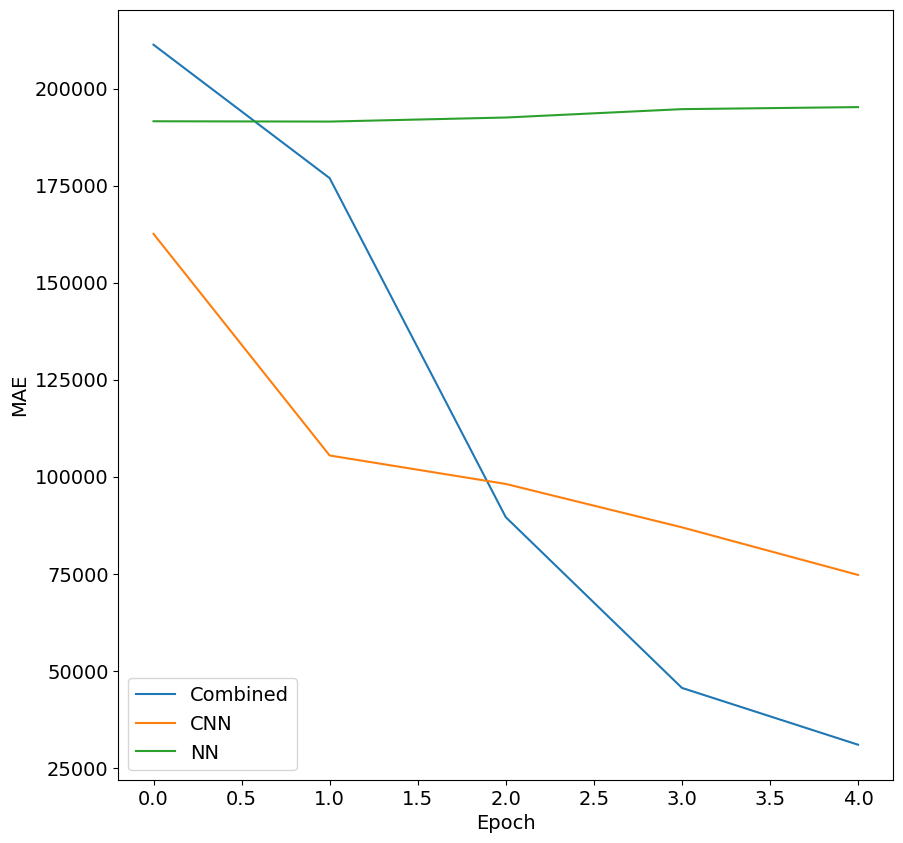

In [ ]:

#plt.plot(combinedModelHistory.history['mae'],label='Combined')
plt.plot(combinedModelHistory.history['val_mae'],label='Combined')
#plt.plot(historyCNN.history['mae'])


plt.plot(historyCNN.history['val_mae'],label='CNN')
#plt.plot(historyNN.history['mae'])
plt.plot(historyNN.history['val_mae'],label='NN')
plt.legend()
plt.xlabel("Epoch");
plt.ylabel("MAE");


In [ ]:
#plt.plot(combinedModelHistory.history['mae'],label='Combined')
plt.plot(combinedModelHistory.history['val_mse'],label='Combined')
#plt.plot(historyCNN.history['mae'])
plt.plot(historyCNN.history['val_mse'],label='CNN')
#plt.plot(historyNN.history['mae'])
plt.plot(historyNN.history['val_mse'],label='NN')
plt.legend()
plt.xlabel("Epoch");
plt.ylabel("MSE");

NameError: ignored

In [ ]:
predictionsCNN = modelCNN.predict(test_set)
predictionsNN = modelNN.predict(test_set)
predictionsCombined = modelCombined.predict([test_set,test_set])
predictionsCNN = np.array(predictionsCNN)
predictionsNN = np.array(predictionsNN)
predictionsCombined = np.array(predictionsCombined)

19/19 [==============================] - 15s 790ms/step


In [ ]:
#This is just for presentation
predictionsCombined = modelCombined.predict([test_set,test_set])

predictionsCombined = np.array(predictionsCombined)

In [ ]:
isoType=0;

#plt.scatter(test_conc[:,isoType], predictionsCNN[:,isoType],alpha=0.2,color='red',label = 'CNN');
#plt.scatter(test_conc[:,isoType], predictionsNN[:,isoType],alpha=0.2,color='blue',label = 'NN');
plt.scatter(test_conc[:,isoType], predictionsCombined[:,isoType],alpha=0.2,color='green',label = 'Combined');
plt.legend(loc="upper left")
plt.plot();
plt.title("Sim Xe131m Results");
plt.xlabel('Test Concentrations');
plt.ylabel('Predicted Concentrations');

In [ ]:
isoType=1;

#plt.scatter(test_conc[:,isoType], predictionsCNN[:,isoType],alpha=0.2,color='red',label = 'CNN');
#plt.scatter(test_conc[:,isoType], predictionsNN[:,isoType],alpha=0.2,color='blue',label = 'NN');
plt.scatter(test_conc[:,isoType], predictionsCombined[:,isoType],alpha=0.2,color='green',label = 'Combined');
plt.legend(loc="upper left")
plt.plot();
plt.title("Sim Xe133 Results");
plt.xlabel('Test Concentrations');
plt.ylabel('Predicted Concentrations');

In [ ]:
isoType=2;

#plt.scatter(test_conc[:,isoType], predictionsCNN[:,isoType],alpha=0.2,color='red',label = 'CNN');
#plt.scatter(test_conc[:,isoType], predictionsNN[:,isoType],alpha=0.2,color='blue',label = 'NN');
plt.scatter(test_conc[:,isoType], predictionsCombined[:,isoType],alpha=0.2,color='green',label = 'Combined');
plt.legend(loc="upper left")
plt.plot();
plt.title("Sim Xe133m Results");
plt.xlabel('Test Concentrations');
plt.ylabel('Predicted Concentrations');

In [ ]:
isoType=3;

#plt.scatter(test_conc[:,isoType], predictionsCNN[:,isoType],alpha=0.2,color='red',label = 'CNN');
#plt.scatter(test_conc[:,isoType], predictionsNN[:,isoType],alpha=0.2,color='blue',label = 'NN');
plt.scatter(test_conc[:,isoType], predictionsCombined[:,isoType],alpha=0.2,color='green',label = 'Combined');
plt.legend(loc="upper left")
plt.plot();
plt.title("Sim Xe135 Results");
plt.xlabel('Test Concentrations');
plt.ylabel('Predicted Concentrations');

In [ ]:
# Function to pull data from files
def dataBetweenLines(self, startline, stopline):
        return [[float(s) for s in line.split()] for line in self[startline : stopline+1]]

In [ ]:
# This block loads INL Test 8 and Test 9
# Our model predicts in counts of atoms, so we have to then convert our predictions from our model
# into SCM/mBq

fileNames=[r'/20191018-060000-EG001-2-samp.pbg',r'/20191018-120001-EG001-3-samp.pbg',
           r'/20191018-180002-EG001-0-samp.pbg',r'/20191019-000002-EG001-1-samp.pbg',
           r'/20191019-060002-EG001-2-samp.pbg',r'/20191019-120002-EG001-3-samp.pbg',
           r'/20191019-180003-EG001-0-samp.pbg',r'/20191020-000003-EG001-1-samp.pbg',
           r'/20191020-060003-EG001-2-samp.pbg',r'/20191020-120004-EG001-3-samp.pbg',
           r'/20191020-180005-EG001-0-samp.pbg',r'/20191021-000006-EG001-1-samp.pbg'];
FileNames=[r'/20191003-120059-EG001-3-samp.pbg',r'/20191003-180100-EG001-0-samp.pbg',
           r'/20191004-000100-EG001-1-samp.pbg',r'/20191004-060100-EG001-2-samp.pbg',
           r'/20191004-120100-EG001-3-samp.pbg',r'/20191004-180100-EG001-0-samp.pbg',
           r'/20191005-000101-EG001-1-samp.pbg',r'/20191005-060101-EG001-2-samp.pbg',
           r'/20191005-120102-EG001-3-samp.pbg',r'/20191005-180102-EG001-0-samp.pbg',
           r'/20191006-000103-EG001-1-samp.pbg',r'/20191006-060103-EG001-2-samp.pbg'];
os.chdir(r'/content/drive/MyDrive/XeData/INL');
dir="Program- Xe131m and Xe133 Concentrations vs Time";
dir2="133,133m Ingrowth Test Files";
T9=[];T8=[];

for file in fileNames:
    f=open(dir+file , 'r')
    bg_data2=[]
    bg_data2.extend([line.rstrip('\n') for line in f])
    f.close()

    lin_index=[]
    for i, string in enumerate(bg_data2):
        if ('#Histogram') in string:
            lin_index.append(i)
        if ('STOP') in string or ('#Certificate') in string:
            lin_index.append(i)

    bg_dat=dataBetweenLines(bg_data2, lin_index[0]+2, lin_index[1]-1)
    T9.append(bg_dat);
T9=np.array(T9);
print(T9.shape);

for file in FileNames:
    f=open(dir2+file , 'r')
    bg_data2=[]
    bg_data2.extend([line.rstrip('\n') for line in f])
    f.close()

    lin_index=[]
    for i, string in enumerate(bg_data2):
        if ('#Histogram') in string:
            lin_index.append(i)
        if ('STOP') in string or ('#Certificate') in string:
            lin_index.append(i)

    bg_dat=dataBetweenLines(bg_data2, lin_index[0]+2, lin_index[1]-1)
    T8.append(bg_dat);
T8=np.array(T8);
print(T8.shape);



#CNN
T8RealCountsCNN=[]
T8RealCountsCNN = modelCNN.predict(T8)

for j in range(0,len(T8RealCountsCNN[0])):
    for k in range(0,4):
        if T8RealCountsCNN[j][k]<0:
            T8RealCountsCNN[j][k]=0;

T8RealInSCM_CNN=np.zeros([len(T8RealCountsCNN[:,0]),4]);
for j in range(0,len(T8RealCountsCNN[0])):
    T8RealInSCM_CNN[j][0]=T8RealCountsCNN[j][0]*(0.4535/10000);
    T8RealInSCM_CNN[j][1]=T8RealCountsCNN[j][1]*(1.0240/10000);
    T8RealInSCM_CNN[j][2]=T8RealCountsCNN[j][2]*(2.452/10000);
    T8RealInSCM_CNN[j][3]=T8RealCountsCNN[j][3]*(14.10/10000);

T9RealCountsCNN=[]
T9RealCountsCNN = modelCNN.predict(T9)

for j in range(0,len(T9RealCountsCNN[0])):
    for k in range(0,4):
        if T9RealCountsCNN[j][k]<0:
            T9RealCountsCNN[j][k]=0;

T9RealInSCM_CNN=np.zeros([len(T9RealCountsCNN[:,0]),4]);
for j in range(0,len(T9RealCountsCNN[0])):
    T9RealInSCM_CNN[j][0]=T9RealCountsCNN[j][0]*(0.4535/10000);
    T9RealInSCM_CNN[j][1]=T9RealCountsCNN[j][1]*(1.0240/10000);
    T9RealInSCM_CNN[j][2]=T9RealCountsCNN[j][2]*(2.452/10000);
    T9RealInSCM_CNN[j][3]=T9RealCountsCNN[j][3]*(14.10/10000);


#NN
T8RealCountsNN=[]
T8RealCountsNN = modelNN.predict(T8)

for j in range(0,len(T8RealCountsNN[0])):
    for k in range(0,4):
        if T8RealCountsNN[j][k]<0:
            T8RealCountsNN[j][k]=0;

T8RealInSCM_NN=np.zeros([len(T8RealCountsNN[:,0]),4]);
for j in range(0,len(T8RealCountsNN[0])):
    T8RealInSCM_NN[j][0]=T8RealCountsNN[j][0]*(0.4535/10000);
    T8RealInSCM_NN[j][1]=T8RealCountsNN[j][1]*(1.0240/10000);
    T8RealInSCM_NN[j][2]=T8RealCountsNN[j][2]*(2.452/10000);
    T8RealInSCM_NN[j][3]=T8RealCountsNN[j][3]*(14.10/10000);

T9RealCountsNN=[]
T9RealCountsNN = modelNN.predict(T9)

for j in range(0,len(T9RealCountsNN[0])):
    for k in range(0,4):
        if T9RealCountsNN[j][k]<0:
            T9RealCountsNN[j][k]=0;

T9RealInSCM_NN=np.zeros([len(T9RealCountsNN[:,0]),4]);
for j in range(0,len(T9RealCountsNN[0])):
    T9RealInSCM_NN[j][0]=T9RealCountsNN[j][0]*(0.4535/10000);
    T9RealInSCM_NN[j][1]=T9RealCountsNN[j][1]*(1.0240/10000);
    T9RealInSCM_NN[j][2]=T9RealCountsNN[j][2]*(2.452/10000);
    T9RealInSCM_NN[j][3]=T9RealCountsNN[j][3]*(14.10/10000);


#Combined
T8RealCountsComb=[]
T8RealCountsComb = modelCombined.predict([T8, T8])

for j in range(0,len(T8RealCountsComb[0])):
    for k in range(0,4):
        if T8RealCountsComb[j][k]<0:
            T8RealCountsComb[j][k]=0;

T8RealInSCM_Comb=np.zeros([len(T8RealCountsComb[:,0]),4]);
for j in range(0,len(T8RealCountsComb[0])):
    T8RealInSCM_Comb[j][0]=T8RealCountsComb[j][0]*(0.4535/10000);
    T8RealInSCM_Comb[j][1]=T8RealCountsComb[j][1]*(1.0240/10000);
    T8RealInSCM_Comb[j][2]=T8RealCountsComb[j][2]*(2.452/10000);
    T8RealInSCM_Comb[j][3]=T8RealCountsComb[j][3]*(14.10/10000);

T9RealCountsComb=[]
T9RealCountsComb = modelCombined.predict([T9,T9])

for j in range(0,len(T9RealCountsComb[0])):
    for k in range(0,4):
        if T9RealCountsComb[j][k]<0:
            T9RealCountsComb[j][k]=0;

T9RealInSCM_Comb=np.zeros([len(T9RealCountsComb[:,0]),4]);
for j in range(0,len(T9RealCountsComb[0])):
    T9RealInSCM_Comb[j][0]=T9RealCountsComb[j][0]*(0.4535/10000);
    T9RealInSCM_Comb[j][1]=T9RealCountsComb[j][1]*(1.0240/10000);
    T9RealInSCM_Comb[j][2]=T9RealCountsComb[j][2]*(2.452/10000);
    T9RealInSCM_Comb[j][3]=T9RealCountsComb[j][3]*(14.10/10000);


T9U131mPeakFit = 0;
T9U133PeakFit = 0;
T9U133mPeakFit = 0;
T8U133PeakFit = 0;
T8U131mPeakFit = 0;
T8U133mPeakFit = 0;

(12, 256, 256)
(12, 256, 256)
1/1 [==============================] - 1s 911ms/step


In [ ]:
# These are the INL results from peak fitting

PFT9131m=np.array([20.04270841,19.77969752,19.45298095,19.20904544,18.02392746,18.50447352,
        18.88904585,17.18948101,16.42800428,18.14367871,17.38549202,15.76603429]);
PFT9131mU=2*np.array([1.48114894,1.48378936,1.48031242,1.48313134,1.33200348,1.38805765,
           1.43738478,1.32725962,1.21405049,1.36092004,1.3229617,1.21734773]);
PFT9133=np.array([26.04706207,25.03205559,24.43701254,23.44998095,21.373914,21.75165601,
        20.59140172,19.75284205,18.69539137,18.0108852,17.31030808,16.68459615]);
PFT9133U=2*np.array([0.35903869,0.3577571,0.35823803,0.35565088,0.29557905,0.3109621,
          0.30263358,0.30036094,0.25875577,0.25807045,0.25490259,0.25416207]);
PFT9133m=np.array([0.02721368,0.16483882,0,0.11786851,0.0079024,0.21300619,
        0,0.03096415,0,0.21505218,0.05196294,0.06969693]);
PFT9133mU=2*np.array([0.35903869,0.3577571,0.35823803,0.35565088,0.29557905,0.3109621,
           0.30263358,0.30036094,0.25875577,0.25807045,0.25490259,0.25416207]);
PFT8133=np.array([146.83882269,138.61750662,138.85351791,131.04290686,129.44100734,
         121.43632517,120.78883609,113.62330635,111.90866945,105.00309296,
         101.28337485,97.85009618]);
PFT8133U=2*np.array([2.07835992,2.01629535,2.08930742,1.79132117,1.83191281,1.7669088,
          1.81774741,1.55275627,1.58399968,1.52748711,1.52463464,1.33745122]);
PFT8133m=np.array([14.36749493,13.5167944,12.5539674,12.13794305,10.47626194,9.2523843,
          8.74346773,8.10627165,7.07511021,6.3872681,6.31979067,5.78503244]);
PFT8133mU=2*np.array([0.6503962,0.65506521,0.6584416,0.68938236,0.47636279,0.45058679,
           0.46043438,0.46214941,0.32484372,0.31272675,0.33422107,0.33141676]);
PFT8131m=np.array([0,0,0,0,0,0,0,0,0,0,0,0]);
PFT8131mU=2*np.array([0.09374972,0.07687314,0.07567079,0.07117356,0.08141252,0.06963985,
           0.06740778,0.06029472,0.07166693,0.05903333,0.05814703,0.05243295]);

# Everything below here I am still trying to figure out, something about how Connor stored the arrays is different than what I do so I need to figure that out.

In [ ]:



meanT9RealInSCM_CNN =T9RealInSCM_CNN
meanT9RealInSCM_NN = T9RealInSCM_NN
meanT9RealInSCM_Comb = T9RealInSCM_Comb
meanT8RealInSCM_CNN =T8RealInSCM_CNN
meanT8RealInSCM_NN = T8RealInSCM_NN
meanT8RealInSCM_Comb = T8RealInSCM_Comb


In [ ]:
meanT9RealInSCM_CNN[:,0]

array([551.2777745 , 551.8267816 , 489.90466715, 494.2218511 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

0
0
0
0
0
0
0
0
0
0
0
0


<function matplotlib.pyplot.show(close=None, block=None)>

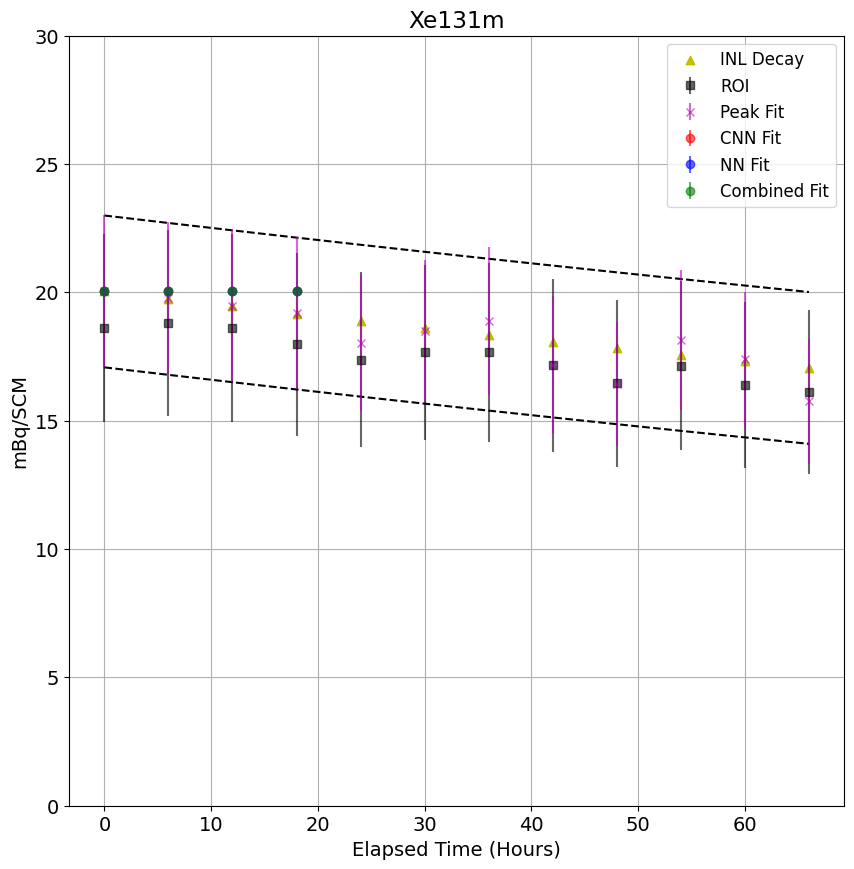

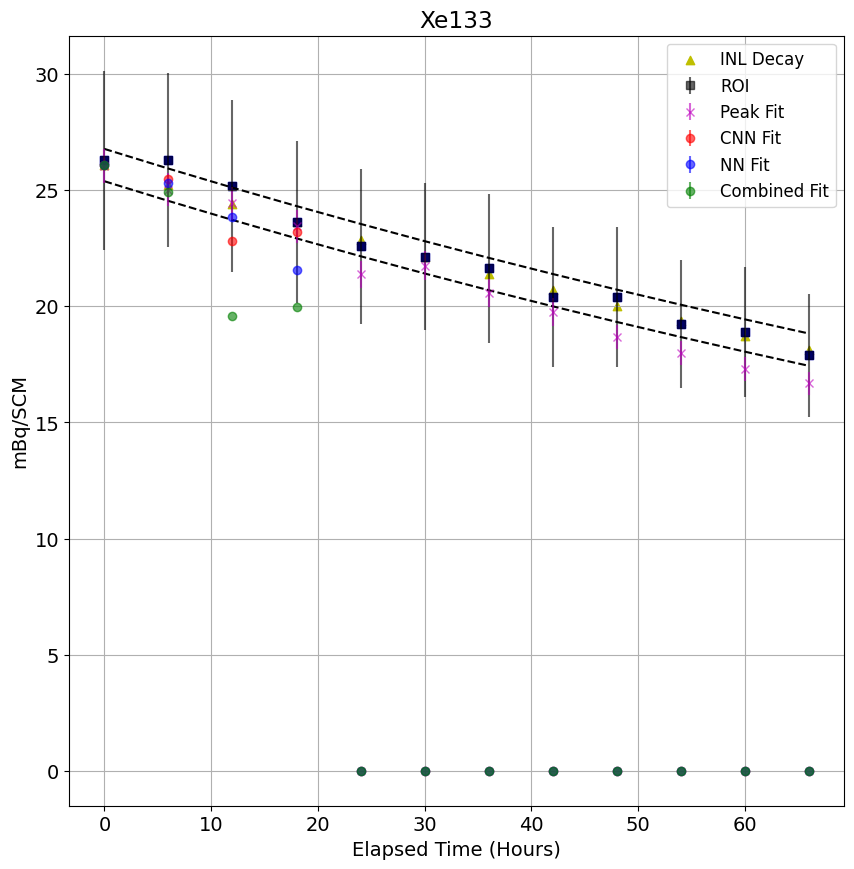

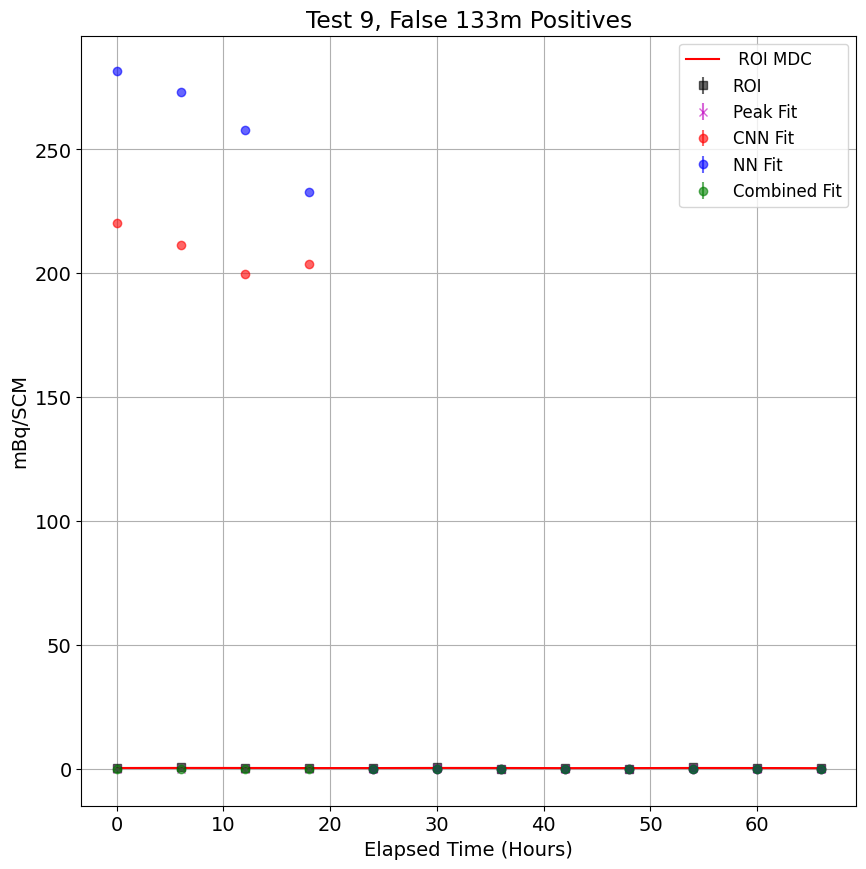

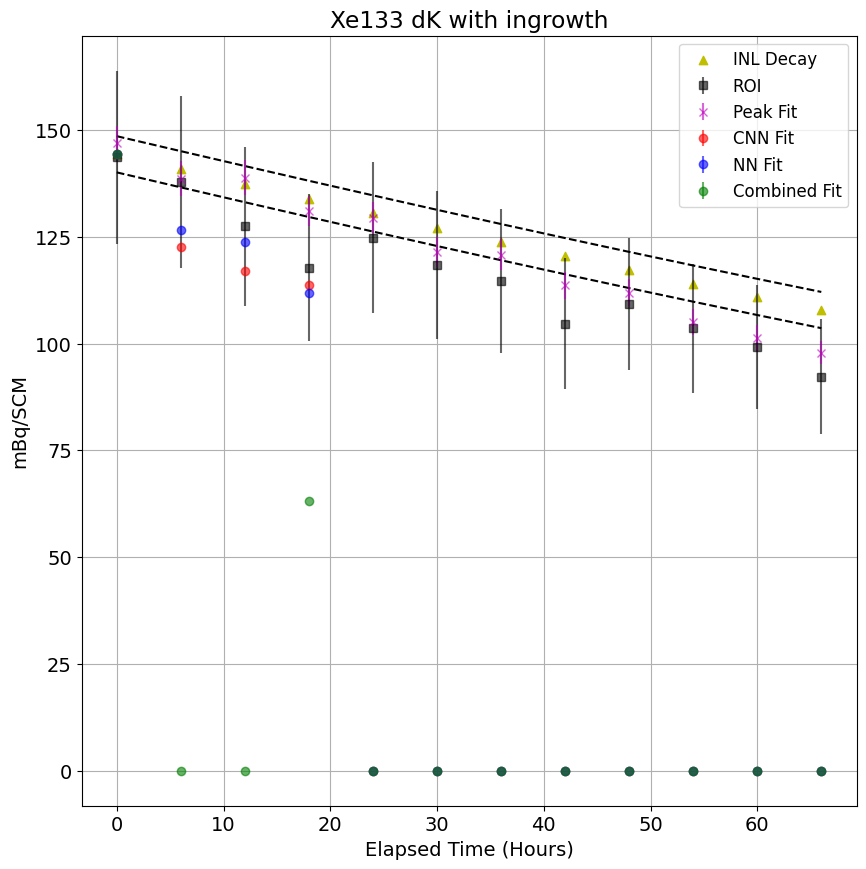

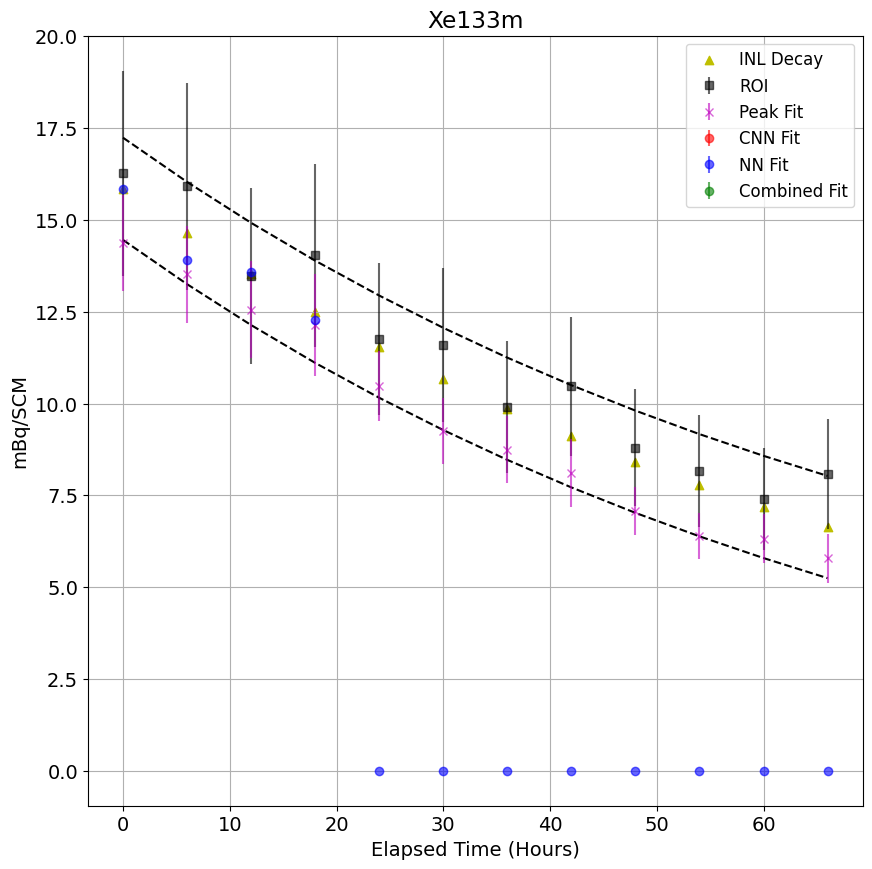

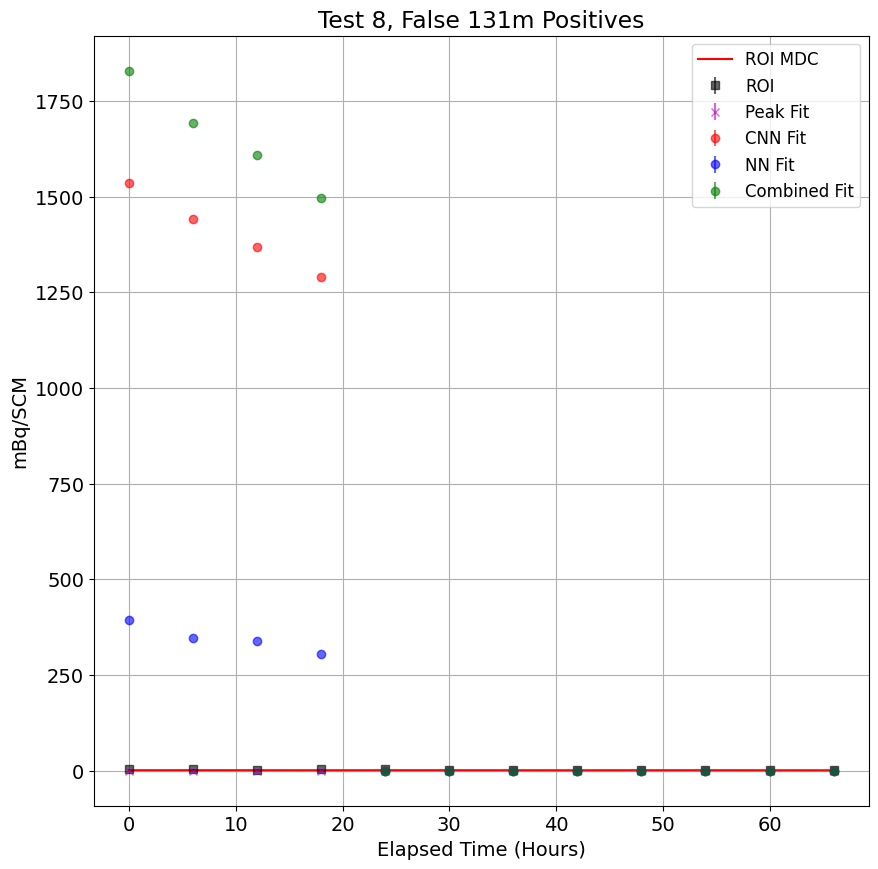

In [ ]:
#T9 131m decay
figure = plt.figure()
hours=[0,6,12,18,24,30,36,42,48,54,60,66]
NegSigma4=[17.079,16.788,16.501,16.218,15.939,15.665,15.394,15.128,14.865,14.606,14.351,14.099]
PosSigma4=[22.995,22.704,22.417,22.134,21.855,21.581,21.310,21.044,20.781,20.522,20.267,20.015]
T9_2Sigma131mROI=[3.6664,3.6206,3.6704,3.548,3.4242,3.4014,3.486,3.388,3.2444,3.3056,3.24,3.18,]
INLDecay131m4=[20.03682696,19.74570935,19.45882141,19.17610171,18.89748968,18.62292564,18.35235078,18.08570713,17.82293758,17.56398585,17.30879646,17.05731474]
T9C131mROI=[18.6221,18.8214,18.6227,17.9706,17.3818,17.6596,17.6636,17.1527,16.4577,17.1509,16.39,16.12]
#plot INL
plt.scatter(hours,INLDecay131m4,c='y',marker='^', label='INL Decay')
plt.plot(hours,NegSigma4,'--',c='k')
plt.plot(hours,PosSigma4,'--',c='k')
#plot ROI
plt.errorbar(hours,T9C131mROI,T9_2Sigma131mROI,fmt='sk', label='ROI',alpha=0.6)
#plot Peak Fit
plt.errorbar(hours,PFT9131m,PFT9131mU,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)

#Scale the first result to the INL result
T9131mScaleCNN=20.03682696/meanT9RealInSCM_CNN[:,0];
T9131mScaleNN=20.03682696/meanT9RealInSCM_NN[:,0];
T9131mScaleComb=20.03682696/meanT9RealInSCM_Comb[:,0];
#plot NN
plt.errorbar(hours,meanT9RealInSCM_CNN[:,0]*T9131mScaleCNN,2*T9U131mPeakFit,fmt='oc', label='CNN Fit',alpha=0.6,color='red') #TEST
plt.errorbar(hours,meanT9RealInSCM_NN[:,0]*T9131mScaleNN,2*T9U131mPeakFit,fmt='oc', label='NN Fit',alpha=0.6,color='blue') #TEST
plt.errorbar(hours,meanT9RealInSCM_Comb[:,0]*T9131mScaleComb,2*T9U131mPeakFit,fmt='oc', label='Combined Fit',alpha=0.6,color='green') #TEST

#plot options
plt.ylim(0,30)
plt.legend()
plt.legend(prop={'size': 12})
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.title('Xe131m')
plt.grid()
plt.show

chiCNN=0;
chiNN=0;
chiComb=0;

#for i in range(0,len(INLDecay131m4)):
#    chiCNN=chiCNN+(INLDecay131m4[i]-meanT9RealInSCM_CNN[i,0]*T9131mScaleCNN)**2;
#    chiNN=chiNN+(INLDecay131m4[i]-meanT9RealInSCM_NN[i,0]*T9131mScaleNN)**2;
#    chiComb=chiComb+(INLDecay131m4[i]-meanT9RealInSCM_Comb[i,0]*T9131mScaleComb)**2;
print(chiCNN);
print(chiNN);
print(chiComb);

#T9 133 decay
figure = plt.figure()
NegSigma2=[25.389,24.541,23.721,22.927,22.159,21.416,20.697,20.002,19.329,18.678,18.048,17.438]
PosSigma2=[26.78145115,25.93339075,25.11290153,24.31908712,23.55108029,22.80804202,22.08916057,21.39365057,20.72075219,20.06973032,19.43987373,18.83049432]
T9_2Sigma133ROI=[3.865,3.75,3.7084,3.4856,3.3268,3.1634,3.193,3.0136,3.008,2.7572,2.8,2.64]
INLDecay1332=[26.08545115,25.23739075,24.41690153,23.62308712,22.85508029,22.11204202,21.39316057,20.69765057,20.02475219,19.37373032,18.74387373,18.13449432,]
T9C133ROI=[26.2835,26.321,25.1944,23.6217,22.5849,22.1379,21.633,20.3875,20.4108,19.2416,18.91,17.89]
#Plot INL
plt.scatter(hours,INLDecay1332,c='y',marker='^', label='INL Decay')
plt.plot(hours,NegSigma2,'--',c='k')
plt.plot(hours,PosSigma2,'--',c='k')
#Plot ROI
plt.errorbar(hours,T9C133ROI,T9_2Sigma133ROI,fmt='sk',label='ROI',alpha=0.6)
plt.scatter(hours,T9C133ROI,c='b',marker='s')
#Plot peak fit
plt.errorbar(hours,PFT9133,PFT9133U,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)

#Scale the first result to the INL result
T9133ScaleCNN=26.08545115/meanT9RealInSCM_CNN[0][1];
T9133ScaleNN=26.08545115/meanT9RealInSCM_NN[0][1];
T9133ScaleComb=26.08545115/meanT9RealInSCM_Comb[0][1];

#plot NN
plt.errorbar(hours, meanT9RealInSCM_CNN[:,1]*T9133ScaleCNN, 2*T9U133PeakFit,fmt='oc', label='CNN Fit',alpha=0.6,color='red') #TEST
plt.errorbar(hours, meanT9RealInSCM_NN[:,1]*T9133ScaleNN, 2*T9U133PeakFit,fmt='oc', label='NN Fit',alpha=0.6,color='blue') #TEST
plt.errorbar(hours, meanT9RealInSCM_Comb[:,1]*T9133ScaleComb, 2*T9U133PeakFit,fmt='oc', label='Combined Fit',alpha=0.6,color='green') #TEST

#Plot
#plt.ylim(0,35)
plt.legend()
plt.legend(prop={'size': 12})
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.title('Xe133')
plt.grid()
plt.show


chiCNN=0;
chiNN=0;
chiComb=0;
#for i in range(0,len(INLDecay1332)):
#    chiCNN=chiCNN+(INLDecay1332[i]-meanT9RealInSCM_CNN[i,1]*T9133ScaleCNN)**2;
#    chiNN=chiNN+(INLDecay1332[i]-meanT9RealInSCM_NN[i,1]*T9133ScaleNN)**2;
#    chiComb=chiComb+(INLDecay1332[i]-meanT9RealInSCM_Comb[i,1]*T9133ScaleComb)**2;
print(chiCNN);
print(chiNN);
print(chiComb);


#T9 133m False Positives
figure = plt.figure()
ROIFalse=[.482, .770, .291, .194, .325, .654, -.024, .222, .095, .648, .21, .310]
ROIMDC=[.383, .410, .394, .359, .361, .405, .390, .340, .351, .390, .377, .326]
ErrBar=[.126, .145, .123, .111, .115, .139, .117, .106, .106, .135, .120, .1]
#Plot ROI MDC
plt.plot(hours,ROIMDC, c='r', label=' ROI MDC')
#Plot ROI
plt.errorbar(hours, ROIFalse, ErrBar, fmt='sk', label='ROI',alpha=0.6)
#Plot Peak Fit
plt.errorbar(hours,PFT9133m,PFT9133mU,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)
#plot NN

plt.errorbar(hours, meanT9RealInSCM_CNN[:,2], 2*T9U133PeakFit,fmt='oc', label='CNN Fit',alpha=0.6,color='red') #TEST
plt.errorbar(hours, meanT9RealInSCM_NN[:,2], 2*T9U133PeakFit,fmt='oc', label='NN Fit',alpha=0.6,color='blue') #TEST
plt.errorbar(hours, meanT9RealInSCM_Comb[:,2], 2*T9U133PeakFit,fmt='oc', label='Combined Fit',alpha=0.6,color='green') #TEST

#Other plot options
plt.title('Test 9, False 133m Positives')
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.legend()
plt.legend(prop={'size': 12})
plt.grid()
plt.show

#T8 133
figure = plt.figure()
INLDecay133=[144.3136718,140.8076146,137.3253391,133.8729343,130.4557694,127.0785566,123.7454093,120.4598953,117.2250861,114.0436019,110.917653,107.8490776]
Spike133=[143.5675,137.771,127.4325,117.71,124.7956,118.4065,114.6943,104.6552,109.2545,103.5334,99.2625,92.2388]
NegSigma=[140.076,136.570,133.088,129.636,126.219,122.841,119.508,116.223,112.988,109.806,106.680,103.612]
PosSigma=[148.5508487,145.0447915,141.562516,138.1101112,134.6929463,131.3157335,127.9825862,124.6970722,121.462263,118.2807788,115.1548299,112.0862545]
TwoSigma=[20.307,20.1332,18.6822,17.2172,17.6596,17.318,16.818,15.31,15.467,15.149,14.5588,13.5028]
#plot INL
plt.plot(hours,NegSigma,'--',c='k')
plt.plot(hours,PosSigma,'--',c='k')
plt.scatter(hours,INLDecay133,c='y',marker='^',label='INL Decay')
#plot ROI
plt.errorbar(hours,Spike133,TwoSigma,fmt='sk',label='ROI',alpha=0.6)
#plot peak fit
plt.errorbar(hours,PFT8133,PFT8133U,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)

#Scale the first result to the INL result
T8133ScaleCNN=144.3136718/meanT8RealInSCM_CNN[0][1];
T8133ScaleNN=144.3136718/meanT8RealInSCM_NN[0][1];
T8133ScaleComb=144.3136718/meanT8RealInSCM_Comb[0][1];

#plot NN
plt.errorbar(hours, meanT8RealInSCM_CNN[:,1]*T8133ScaleCNN, 2*T8U133PeakFit,fmt='oc', label='CNN Fit',alpha=0.6,color='red')
plt.errorbar(hours, meanT8RealInSCM_NN[:,1]*T8133ScaleNN, 2*T8U133PeakFit,fmt='oc', label='NN Fit',alpha=0.6,color='blue')
plt.errorbar(hours, meanT8RealInSCM_Comb[:,1]*T8133ScaleComb, 2*T8U133PeakFit,fmt='oc', label='Combined Fit',alpha=0.6,color='green')

#other plot options
#plt.ylim(60,180)
plt.legend()
plt.legend(prop={'size': 12})
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.title('Xe133 dK with ingrowth')
plt.grid()
plt.show


chiCNN=0;
chiNN=0;
chiComb=0;
#for i in range(0,len(INLDecay133)):
#    chiCNN=chiCNN+(INLDecay133[i]-meanT8RealInSCM_CNN[i,1]*T8133ScaleCNN)**2;
#    chiNN=chiNN+(INLDecay133[i]-meanT8RealInSCM_NN[i,1]*T8133ScaleNN)**2;
#    chiComb=chiComb+(INLDecay133[i]-meanT8RealInSCM_Comb[i,1]*T8133ScaleComb)**2;
print(chiCNN);
print(chiNN);
print(chiComb);

#T8 133m
figure = plt.figure()
NegSigma3=[14.456,13.251,12.137,11.107,10.157,9.278,8.466,7.716,7.023,6.383,5.792,5.245]
PosSigma3=[17.240,16.035,14.921,13.891,12.941,12.062,11.250,10.500,9.807,9.167,8.576,8.029]
TwoSigma3=[2.794,2.818,2.402,2.49,2.072,2.1,1.804,1.892,1.598,1.534,1.386,1.494]
INLDecay133m3=[15.84828167,14.64261256,13.52866558,12.49946289,11.54855751,10.66999293,9.858265757,9.108291299,8.415371673,7.775166391,7.183665173,6.637162824]
Spike133m3=[16.27,15.915,13.467,14.043,11.768,11.604,9.91,10.476,8.798,8.167,7.404,8.082]
#plot INL
plt.scatter(hours,INLDecay133m3,c='y',marker='^',label='INL Decay')
plt.plot(hours,NegSigma3,'--',c='k')
plt.plot(hours,PosSigma3,'--',c='k')
#plot ROI
plt.errorbar(hours, Spike133m3,TwoSigma3,fmt='sk',label='ROI',alpha=0.6)
#plot peak fit
plt.errorbar(hours,PFT8133m,PFT8133mU,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)

#Scale the first result to the INL result
T8133mScaleCNN=15.84828167/meanT8RealInSCM_CNN[0][2];
T8133mScaleNN=15.84828167/meanT8RealInSCM_NN[0][2];
T8133mScaleComb=15.84828167/meanT8RealInSCM_Comb[0][2];
#plot NN
plt.errorbar(hours, meanT8RealInSCM_CNN[:,2]*T8133mScaleCNN, 2*T8U133mPeakFit,fmt='oc', label='CNN Fit',alpha=0.6,color='red')
plt.errorbar(hours, meanT8RealInSCM_NN[:,2]*T8133mScaleNN, 2*T8U133mPeakFit,fmt='oc', label='NN Fit',alpha=0.6,color='blue')
plt.errorbar(hours, meanT8RealInSCM_Comb[:,2]*T8133mScaleComb, 2*T8U133mPeakFit,fmt='oc', label='Combined Fit',alpha=0.6,color='green')

#other plot options
plt.legend()
plt.legend(prop={'size': 12})
#plt.ylim(0,25)
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.title('Xe133m')
plt.grid()
plt.show



chiCNN=0;
chiNN=0;
chiComb=0;
#for i in range(0,len(INLDecay133)):
#    chiCNN=chiCNN+(INLDecay133m3[i]-meanT8RealInSCM_CNN[i,2]*T8133mScaleCNN)**2;
#    chiNN=chiNN+(INLDecay133m3[i]-meanT8RealInSCM_NN[i,2]*T8133mScaleNN)**2;
#    chiComb=chiComb+(INLDecay133m3[i]-meanT8RealInSCM_Comb[i,2]*T8133mScaleComb)**2;
print(chiCNN);
print(chiNN);
print(chiComb);

#T8 131m False Positive
figure = plt.figure()
ROIFalse1=[3.5830, 3.3510, 2.5070, 3.5980, 3.0930, 2.6910, 1.6640, 2.9920, 2.4950, 2.4060, 2.0650, 2.0260]
ROIMDC1=[1.1315, 1.1566, 1.0963, 1.0166, 1.1297, 1.1414, 1.0545, .9709, 1.0915, 1.1036, .9883, .9247]
ErrBar1=[.5050, .4800, .4120, .4700, .4530, .4340, .3560, .4170, .4080, .4080, .3600, .3440]
#plot ROI MDC
plt.plot(hours, ROIMDC1, c='r', label='ROI MDC')
#plot ROI
plt.errorbar(hours, ROIFalse1, ErrBar1, fmt='sk', label='ROI',alpha=0.6)
#plot peak fit
plt.errorbar(hours,PFT8131m,PFT8131mU,marker='x',c='m',fmt='o',label='Peak Fit',alpha=0.6)

#Scale the first result to the INL result
T8131mScaleCNN=3.5830/meanT8RealInSCM_CNN[0][0];
T8131mScaleNN=3.5830/meanT8RealInSCM_NN[0][0];
T8131mScaleComb=3.5830/meanT8RealInSCM_Comb[0][0];
#plot NN
plt.errorbar(hours, meanT8RealInSCM_CNN[:,0], 2*T8131mScaleCNN,fmt='oc', label='CNN Fit',alpha=0.6,color='red')
plt.errorbar(hours, meanT8RealInSCM_NN[:,0], 2*T8131mScaleNN,fmt='oc', label='NN Fit',alpha=0.6,color='blue')
plt.errorbar(hours, meanT8RealInSCM_Comb[:,0], 2*T8131mScaleComb,fmt='oc', label='Combined Fit',alpha=0.6,color='green')
#other plot options
plt.title('Test 8, False 131m Positives')
plt.xlabel('Elapsed Time (Hours)')
plt.ylabel('mBq/SCM')
plt.legend()
plt.legend(prop={'size': 12})
plt.grid()
plt.show